In [1]:
from cweqgen import equations
eq = equations("h0")

In [2]:
print(eq)

h_0 = \frac{16 G}{c^{4}} \pi^{2}\frac{\varepsilon I_{zz}}{d} f_{\rm rot}^{2}


In [3]:
eq

h_0 = \frac{16 G}{c^{4}} \pi^{2}\frac{\varepsilon I_{zz}}{d} f_{\rm rot}^{2}

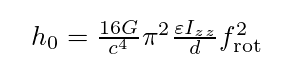

In [4]:
fig = eq.equation(displaytype="matplotlib")
fig.savefig("myequation.pdf")  # save a pdf version of the equation

In [5]:
print(eq.fiducial_equation())

h_0 = 4.23 \times 10^{-26} \; \mathrm{}\left(\frac{1 \; \mathrm{kpc}}{d}\right) \left(\frac{\varepsilon}{1 \times 10^{-6} \; \mathrm{}}\right) \left(\frac{I_{zz}}{1 \times 10^{38} \; \mathrm{m^{2}\,kg}}\right) \left(\frac{f_{\rm rot}}{100 \; \mathrm{Hz}}\right)^{2} 


In [6]:
eq.fiducial_equation()

h_0 = 4.23 \times 10^{-26} \; \mathrm{}\left(\frac{1 \; \mathrm{kpc}}{d}\right) \left(\frac{\varepsilon}{1 \times 10^{-6} \; \mathrm{}}\right) \left(\frac{I_{zz}}{1 \times 10^{38} \; \mathrm{m^{2}\,kg}}\right) \left(\frac{f_{\rm rot}}{100 \; \mathrm{Hz}}\right)^{2} 

In [7]:
eq = equations("h0", ellipticity=1e-7, distance=2.5)
eq.fiducial_equation()

h_0 = 1.69 \times 10^{-27} \; \mathrm{}\left(\frac{2.5 \; \mathrm{kpc}}{d}\right) \left(\frac{\varepsilon}{1 \times 10^{-7} \; \mathrm{}}\right) \left(\frac{I_{zz}}{1 \times 10^{38} \; \mathrm{m^{2}\,kg}}\right) \left(\frac{f_{\rm rot}}{100 \; \mathrm{Hz}}\right)^{2} 

In [8]:
eq.fiducial_equation(momentofinertia=2e38, rotationfrequency=200)

h_0 = 1.35 \times 10^{-26} \; \mathrm{}\left(\frac{2.5 \; \mathrm{kpc}}{d}\right) \left(\frac{\varepsilon}{1 \times 10^{-7} \; \mathrm{}}\right) \left(\frac{I_{zz}}{2 \times 10^{38} \; \mathrm{m^{2}\,kg}}\right) \left(\frac{f_{\rm rot}}{200 \; \mathrm{Hz}}\right)^{2} 

In [9]:
from astropy.units import Unit
eq = equations("h0", distance=1000 * Unit("lyr"), momentofinertia=1e45 * Unit("g cm^2"))
eq.fiducial_equation()

h_0 = 1.38 \times 10^{-25} \; \mathrm{}\left(\frac{1 \times 10^{3} \; \mathrm{lyr}}{d}\right) \left(\frac{\varepsilon}{1 \times 10^{-6} \; \mathrm{}}\right) \left(\frac{I_{zz}}{1 \times 10^{45} \; \mathrm{cm^{2}\,g}}\right) \left(\frac{f_{\rm rot}}{100 \; \mathrm{Hz}}\right)^{2} 

In [10]:
eq = equations("h0")
eq.evaluate()

<Quantity 4.22855608e-26>

In [11]:
eq()

<Quantity 4.22855608e-26>

In [12]:
eq.evaluate(distance=[1.0, 2.0, 3.0] * Unit("kpc"))

<Quantity [4.22855608e-26, 2.11427804e-26, 1.40951869e-26]>

In [13]:
eq.evaluate(distance=[1.0, 2.0, 3.0] * Unit("kpc"), rotationfrequency=[50, 100, 150] * Unit("Hz"))

<Quantity [1.05713902e-26, 2.11427804e-26, 3.17141706e-26]>

In [14]:
eq.evaluate(distance=[1.0, 2.0, 3.0] * Unit("kpc"), rotationfrequency=[50, 100, 150] * Unit("Hz"), mesh=True)

<Quantity [[1.05713902e-26, 5.28569510e-27, 3.52379673e-27],
           [4.22855608e-26, 2.11427804e-26, 1.40951869e-26],
           [9.51425118e-26, 4.75712559e-26, 3.17141706e-26]]>

In [15]:
eq.evaluate(ellipticity=[1e-6, 1e-7], rotationfrequency=[50, 100, 150] * Unit("Hz"), mesh=True)

<Quantity [[1.05713902e-26, 1.05713902e-27],
           [4.22855608e-26, 4.22855608e-27],
           [9.51425118e-26, 9.51425118e-27]]>

In [16]:
# equation for the braking index
eq = equations("brakingindex")

# rearrange to put frequency derivative on the lhs
req = eq.rearrange("rotationfdot")
req.equation()

\dot{f}_{\rm rot} = \frac{1}{n^{1/2}} \left(\ddot{f}_{\rm rot} f_{\rm rot}\right)^{1/2}

In [17]:
# set fiducial value for the braking index of 4!
req = eq.rearrange("rotationfdot", 4)
req.fiducial_equation()

\dot{f}_{\rm rot} = 1.12 \times 10^{-11} \; \mathrm{\frac{Hz}{s}}\left(\frac{\ddot{f}_{\rm rot}}{1 \times 10^{-23} \; \mathrm{\frac{Hz}{s^{2}}}}\right)^{1/2} \left(\frac{f_{\rm rot}}{50 \; \mathrm{Hz}}\right)^{1/2} \left(\frac{4 \; \mathrm{}}{n}\right)^{1/2} 

In [18]:
from cweqgen import equations

# equation for the braking index
eq = equations("brakingindex")

# rearrange to put frequency derivative on the lhs
req = eq.rearrange("rotationfdot")

eqsd = equations("h0spindown")
subeq = eqsd.substitute(req)  # substitute in req
subeq.equation()

h_0^{\rm sd} = \frac{\sqrt{10} \sqrt{G}}{2 c^{3/2}}\frac{I_{zz}^{1/2} \left|{\ddot{f}_{\rm rot}}\right|^{1/4}}{d f_{\rm rot}^{1/4} \left|{n}\right|^{1/4}}

In [19]:
eq = equations("ellipticityspindown")
eq.equation()

\varepsilon^{\rm sd} = \frac{\sqrt{10} c^{5/2}}{32 \pi^{2} \sqrt{G}}\frac{\left|{\dot{f}_{\rm rot}}\right|^{1/2}}{I_{zz}^{1/2} f_{\rm rot}^{5/2}}

In [20]:
# evaluate using rotation period rather than rotation frequency
eq.evaluate(rotationperiod=0.05 * Unit("s"))

<Quantity 0.00033715>

In [21]:
eq = equations("h0spindown")

neweq = eq.to("rotationperiod")
neweq.eqn

h_0^{\rm sd} = \frac{\sqrt{10} \sqrt{G}}{2 c^{3/2}}\frac{I_{zz}^{1/2} \left|{\dot{P}}\right|^{1/2}}{d P^{1/2}}